In [1]:
import keras
import tensorflow
import flask
import PIL


D:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.



The following command must be run outside of the IPython shell:

    $ pip install --upgrade tensorflow

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more informations on how to install packages:

    https://docs.python.org/3/installing/


In [4]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [5]:
from keras.preprocessing.image import ImageDataGenerator

In [6]:
img_gen=ImageDataGenerator(rescale=1/255)

In [7]:
img_gen.flow_from_directory(r'''D:\DSAI-April\Dog and cats\training_set''')
img_gen.flow_from_directory(r'''D:\DSAI-April\Dog and cats\test_set''')

Found 8005 images belonging to 2 classes.
Found 1576 images belonging to 2 classes.


In [8]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout

In [9]:
from keras import optimizers

In [10]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(2,activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
model.compile(loss='categorical_crossentropy'
             ,optimizer='adam',metrics=['accuracy'])

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
flatten_1 (Flatten)          (None, 36864)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               4718720   
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 130       
Total params: 4,745,922
Trainable params: 4,745,922
Non-trainable params: 0
_________________________________________________________________


In [13]:
input_shape=(28,28,1)

In [14]:
train_img_gen=img_gen.flow_from_directory(r'''D:\DSAI-April\Dog and cats\training_set''' 
                            ,target_size=input_shape[:2],batch_size=20,class_mode='categorical',
                           color_mode='grayscale')
test_img_gen=img_gen.flow_from_directory(r'''D:\DSAI-April\Dog and cats\test_set''' 
                            ,target_size=input_shape[:2],batch_size=20,class_mode='categorical',
                           color_mode='grayscale')

Found 8005 images belonging to 2 classes.
Found 1576 images belonging to 2 classes.


In [15]:
train_img_gen.class_indices

{'cats': 0, 'dogs': 1}

In [16]:
history=model.fit_generator(train_img_gen,
                            validation_data=test_img_gen,
                            validation_steps=12,epochs=100,steps_per_epoch=100)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
100/100 [==============================] - 77s 775ms/step - loss: 0.6977 - acc: 0.5325 - val_loss: 0.6723 - val_acc: 0.5917
Epoch 2/100
100/100 [==============================] - 71s 706ms/step - loss: 0.6814 - acc: 0.5695 - val_loss: 0.7168 - val_acc: 0.4458
Epoch 3/100
100/100 [==============================] - 65s 650ms/step - loss: 0.6732 - acc: 0.5820 - val_loss: 0.6133 - val_acc: 0.6875
Epoch 4/100
100/100 [==============================] - 65s 646ms/step - loss: 0.6752 - acc: 0.5775 - val_loss: 0.6576 - val_acc: 0.5875
Epoch 5/100
100/100 [==============================] - 22s 223ms/step - loss: 0.6264 - acc: 0.6580 - val_loss: 0.7084 - val_acc: 0.5417
Epoch 6/100
100/100 [==============================] - 23s 227ms/step - loss: 0.6393 - acc: 0.6380 - val_loss: 0.7622 - val_acc: 0.4458
Epoch 7/100
100/100 [==============================] - 22s 218ms/step - loss: 0.6240 - acc: 0.6390 - val_loss: 0.6372 - val_acc: 0.6610


100/100 [==============================] - 20s 198ms/step - loss: 0.0357 - acc: 0.9890 - val_loss: 2.6743 - val_acc: 0.6333
Epoch 60/100
100/100 [==============================] - 20s 200ms/step - loss: 0.0206 - acc: 0.9930 - val_loss: 2.2228 - val_acc: 0.6568
Epoch 61/100
100/100 [==============================] - 20s 199ms/step - loss: 0.0052 - acc: 0.9980 - val_loss: 2.4746 - val_acc: 0.6750
Epoch 62/100
100/100 [==============================] - 20s 201ms/step - loss: 0.0087 - acc: 0.9980 - val_loss: 1.8530 - val_acc: 0.7250
Epoch 63/100
100/100 [==============================] - 20s 200ms/step - loss: 0.0017 - acc: 0.9995 - val_loss: 2.2555 - val_acc: 0.6667
Epoch 64/100
100/100 [==============================] - 20s 202ms/step - loss: 0.0039 - acc: 0.9985 - val_loss: 2.0738 - val_acc: 0.7292
Epoch 65/100
100/100 [==============================] - 19s 195ms/step - loss: 7.3024e-04 - acc: 1.0000 - val_loss: 2.7143 - val_acc: 0.6500
Epoch 66/100
100/100 [============================

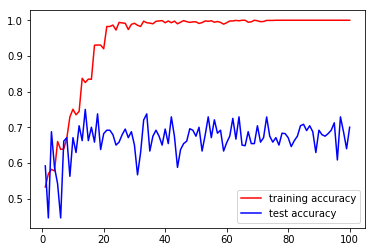

In [17]:
acc=history.history['acc']
val_acc=history.history['val_acc']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'red',label='training accuracy')
plt.plot(epochs,val_acc,'blue',label='test accuracy')
plt.legend()
plt.figure()
plt.show()


In [16]:
model.save('animal_model.h5')

In [20]:
import cv2 

In [21]:
a=cv2.imread('../Dog and cats/test_set/dogs/dog.4002.jpg',0 )


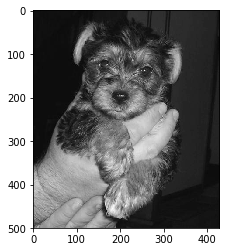

In [22]:
plt.imshow(a,cmap='gray')

In [23]:
model_json=model.to_json()
with open('model.json','w') as json_file:
    json_file.write(model_json)
    
model.save_weights("animodel.h5")